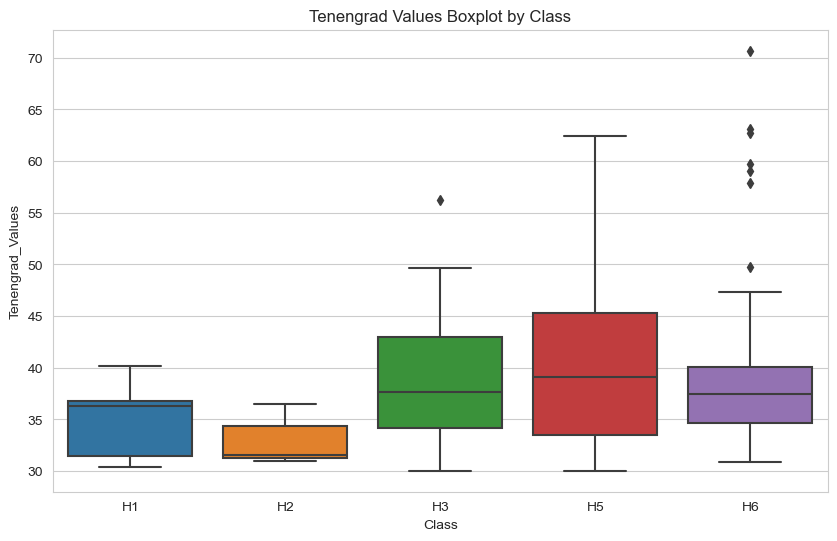

In [5]:
import cv2
import os # Used this module to open and write files to a new directory for storage
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

def plot_boxplot(dataframe):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Class', y='Tenengrad_Values', data=dataframe.explode('Tenengrad_Values'))
    plt.title('Tenengrad Values Boxplot by Class')
    plt.show()

def plot_pairplot(dataframe):
    plt.figure(figsize=(12, 8))
    sns.set_style("whitegrid")
    sns.pairplot(dataframe.explode('Tenengrad_Values'), hue="Class", height=3)
    plt.show()
    
def calculate_tenengrad(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gradient_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    gradient_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    tenengrad = np.sqrt(gradient_x**2 + gradient_y**2).mean()
    return tenengrad

def clean_and_convert_dataset(input_folder, output_folder, tenengrad_threshold, keep_percentage):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Lists to store Tenengrad values for the kept images
    tenengrad_values = []

    # Loop through each image in the input folder
    for filename in os.listdir(input_folder):
        if filename.endswith(('.jpg', '.jpeg', '.png')):
            filepath = os.path.join(input_folder, filename)
            image = cv2.imread(filepath)
            tenengrad = calculate_tenengrad(image)

            # Check if the image meets the criteria to be kept
            if tenengrad >= tenengrad_threshold:
                tenengrad_values.append(tenengrad)

                # Display and save the non-blurry images
                image = cv2.imread(filepath)

                # Display Grayscale version
                grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                
                # Save RGB version
                rgb_output_filepath = os.path.join(output_folder, f"rgb_{os.path.basename(filepath)}")
                cv2.imwrite(rgb_output_filepath, image)

                # Save Grayscale version
                grayscale_output_filepath = os.path.join(output_folder, f"grayscale_{os.path.basename(filepath)}")
                cv2.imwrite(grayscale_output_filepath, grayscale_image)

    return tenengrad_values

if __name__ == "__main__":
    data = {'Class': [], 'Tenengrad_Values': []}
    classes = ["H1", "H2", "H3", "H5", "H6"]
    tenengrad_threshold = 30  # Adjustable threshold
    keep_percentage = 0.1  # Percentage to keep

    for cls in classes:
        input_folder = "../defungi/" + cls
        output_folder = "defungi_clean/" + cls
        tenengrad_values = clean_and_convert_dataset(input_folder, output_folder, tenengrad_threshold, keep_percentage)
        data['Class'].append(cls)
        data['Tenengrad_Values'].append(tenengrad_values)
    df = pd.DataFrame(data)
    # Show a boxplot of the values
    plot_boxplot(df)
    # Show a pairplot of the values
    # plot_pairplot(df)
    # Show which outliers were discarded